In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm
tqdm.pandas()

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.drop(columns=["ArticleId"], inplace=True)

In [5]:
data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [6]:
import re
from bs4 import BeautifulSoup
import string
import wordninja as wn
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string
import nltk 
# nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')

def preprocessing(sentence):
    # make smallercase
    sentence = sentence.lower()

    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)

    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()

    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)

    # Removing punctutation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
#     sentence = ' '.join(wn.split(str(sentence)))

    # Correct the sentence
#     sentence =  str(TextBlob(sentence).correct())

    # decontracted

    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)
    
    # Punctuation Removal
    sentence = "".join(i for i in sentence if i not in string.punctuation)
    
    # Stop Word Removal
    sentence = " ".join(i for i in sentence.split() if i not in allstopwords)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    return snt

In [7]:
data["Tokens"] = data.Text.progress_apply(lambda x: preprocessing(x)) 

100%|██████████| 1490/1490 [00:07<00:00, 200.90it/s]


In [8]:
data.head()

,Text,Category,Tokens
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defendin...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


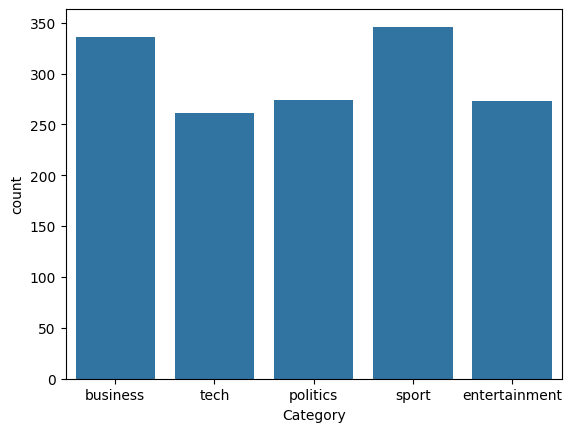

In [9]:
sns.countplot(data=data, x='Category')
plt.show()

# Feature Engineering

Feature Engineering is a very key part of Natural Language Processing. as we all know algorithms and machines can’t understand characters or words or sentences hence we need to encode these words into some specific form of numerical in order to interact with algorithms or machines. we can’t feed the text data containing words /sentences/characters to a machine learning model.

There are various ways to perform feature extraction. some popular and mostly used are:-

    1. Bag of Words model
    2. TF-IDF

## 1. Bag of Words model

The idea is to take the whole text data and count their frequency of occurrence. and map the words with their frequency. This method doesn’t care about the order of the words, but it does care how many times a word occurs and the default bag of words model treats all words equally.

## 2. TF-IDF Model

The BOW model doesn’t give good results since it has a drawback. Assume that there is a particular word that is appearing in all the documents and it comes multiple times, eventually, it will have a higher frequency of occurrence and it will have a greater value that will cause a specific word to have more weightage in a sentence, that’s not good for our analysis.

Term frequency (TF): Number of times a term has appeared in a document. The term frequency is a measure of how frequently or how common a word is for a given sentence.

Inverse Document Frequency (IDF): The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification.

IDF of a word is = log(N/n)

N: total number of documents.
n: number of documents containing a term (word)

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

TfIdf_Vectorizer = TfidfVectorizer(tokenizer = token.tokenize)

X = TfIdf_Vectorizer.fit_transform(data.Tokens)

X_array = X.toarray()

pd.DataFrame(data=X_array, columns = TfIdf_Vectorizer.get_feature_names_out()).head()

e:\PhD\NEWS_ARTICEL_SORTING\news_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aaron,aashare,ab,...,zombie,zone,zonealarm,zoom,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_array.shape

(1490, 23441)

In [14]:
y = data['Category']
y.shape

(1490,)

# Articles

In [15]:
article = """
New Delhi:

SpiceJet employees on Wednesday alleged delay in the disbursal of salaries for the second straight month, with the budget airline saying the payments were being made in a "graded format".

There was a delay in disbursal of salary for staff, including flight crew, for the month of July and many are yet to get the Form 16 for the financial year 2021-22 as well, SpiceJet employees claimed.

"The salary disbursal was timely for June. Also, the salaries are yet to match the pre-COVID-19 levels. The salaries being disbursed to captains and first officers are not even 50 per cent of what they used to be before the pandemic outbreak in March 2020," an employee told PTI.

However, SpiceJet claimed it has started salary disbursal in a "graded format".

"We have started crediting salaries from today. Like the previous month, salary will be credited in a graded format," the airline said in a statement to PTI.

In an internal communication Wednesday, the SpiceJet's Human Resources team informed employees about the delays citing that the "previous few months have been difficult" due to "superlative fuel price hike" and also "historically lean period of July-September".

"We have started to see some green shoots of relief with reduction in fuel price effective August 1. Passenger demand is also expected to be strong as we enter our traditional strong season in end-September," the communication read.
"""

# Detect Catagory

In [16]:
import re
from bs4 import BeautifulSoup
import string
from nltk.stem import WordNetLemmatizer

def detect_catagory(model, sentence):

    # make smallercase
    sentence = sentence.lower()
        
    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)
    
    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()
    
    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)
        
    # Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
    sentence = ' '.join(wn.split(str(sentence)))

    # Correct the sentence
    sentence =  str(TextBlob(sentence).correct())
    
    # decontracted
    
    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    #sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    
    return model.predict(TfIdf_Vectorizer.transform([snt]))[0]

# Get Weight of a word

In [17]:
def get_weight(model, word):
    try:
        print(model.coef_[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except IndexError:
        print(model.coef_.toarray()[0][list(TfIdf_Vectorizer.get_feature_names_out()).index(word)])
    except ValueError:
        pass

# Model Building

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=40)

## 1. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Check Cross Validation Score

clf = LogisticRegression(random_state=42, max_iter=1000)
np.average(cross_val_score(clf, X, y, cv=10))

np.float64(0.9691275167785234)

In [21]:
# Model Building
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.96      0.99      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.99      0.98      0.98        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



In [24]:
# Plot Matrix

In [25]:
def plot_matrix(y_test, y_pred, color="Oranges"):
    labels = np.unique(y_pred)
    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=labels)
    sns.heatmap(cm_df, annot=True, fmt='g', cmap=color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

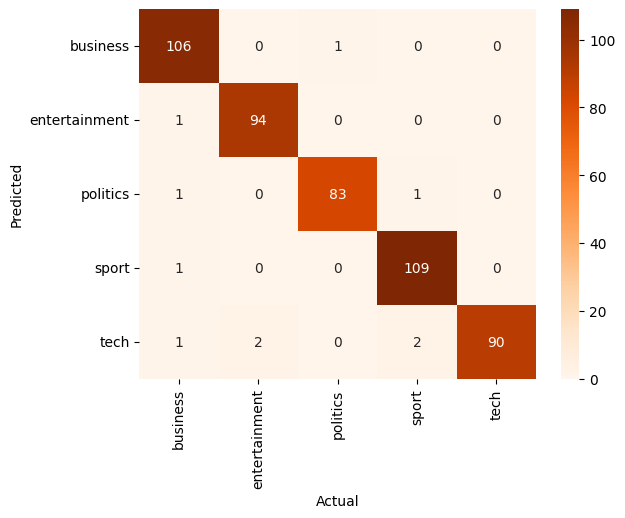

In [26]:
plot_matrix(y_test, y_pred)

In [27]:
print(detect_catagory(clf, article))

business


In [28]:
get_weight(clf, "interesting")

-0.056122873776034435


## Using L2 Regularizations

In [29]:
clf_l2 = LogisticRegression(penalty="l2", C=50, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

np.float64(0.9751677852348994)

In [30]:
clf_l2.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=1000, random_state=42)

In [31]:
y_pred_l2 = clf_l2.predict(X_test)

print(classification_report(y_test, y_pred_l2))

               precision    recall  f1-score   support

     business       0.98      0.98      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.98      0.98      0.98        85
        sport       0.98      0.99      0.99       110
         tech       0.99      0.97      0.98        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



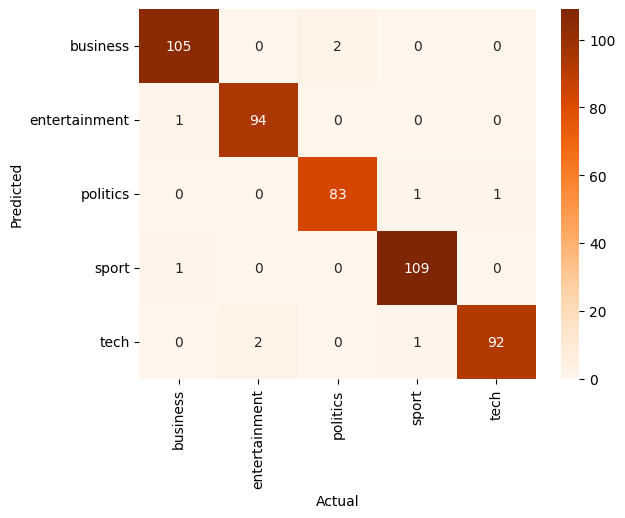

In [32]:
plot_matrix(y_test, y_pred_l2)

In [33]:
detect_catagory(clf_l2, article)

'business'

In [34]:
detect_catagory(clf, article)

'business'

## Using L1 Regularizations

In [35]:
clf_l1 = LogisticRegression(penalty="l1", C=20, random_state=42, max_iter=1000, solver='liblinear')

np.average(cross_val_score(clf_l1, X, y, cv=10))

np.float64(0.959731543624161)

In [36]:
clf_l1.fit(X_train, y_train)

LogisticRegression(C=20, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [37]:
y_pred_l1 = clf_l1.predict(X_test)
print(classification_report(y_test, y_pred_l1))

               precision    recall  f1-score   support

     business       0.92      0.95      0.94       107
entertainment       0.97      0.97      0.97        95
     politics       0.93      0.98      0.95        85
        sport       0.96      0.98      0.97       110
         tech       1.00      0.88      0.94        95

     accuracy                           0.95       492
    macro avg       0.96      0.95      0.95       492
 weighted avg       0.95      0.95      0.95       492



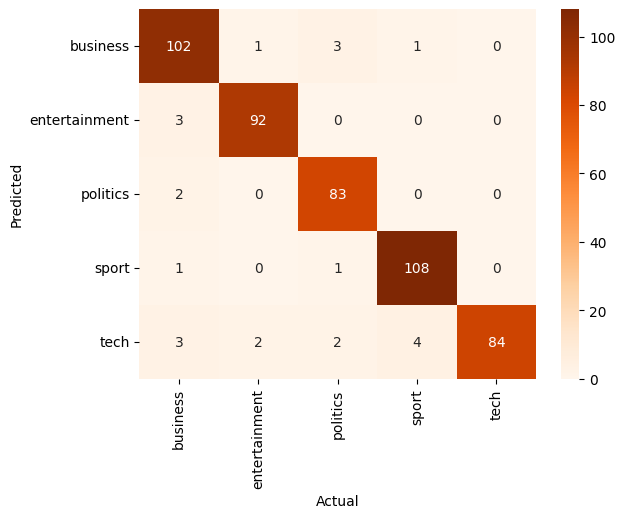

In [38]:
plot_matrix(y_test, y_pred_l1)

In [39]:
detect_catagory(clf_l1, article)

'business'

In [40]:
detect_catagory(clf_l2, article)

'business'

# 2. Support Vector Machine

### 1. Linear Kernal

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification

In [41]:
from sklearn import svm

svc_linear = svm.SVC(kernel ='linear', C = 1)
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_test)

accuracy_score(y_pred, y_test)

0.9796747967479674

In [42]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.98      0.98      0.98       107
entertainment       0.98      0.99      0.98        95
     politics       0.97      0.98      0.97        85
        sport       0.98      0.99      0.99       110
         tech       0.99      0.96      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



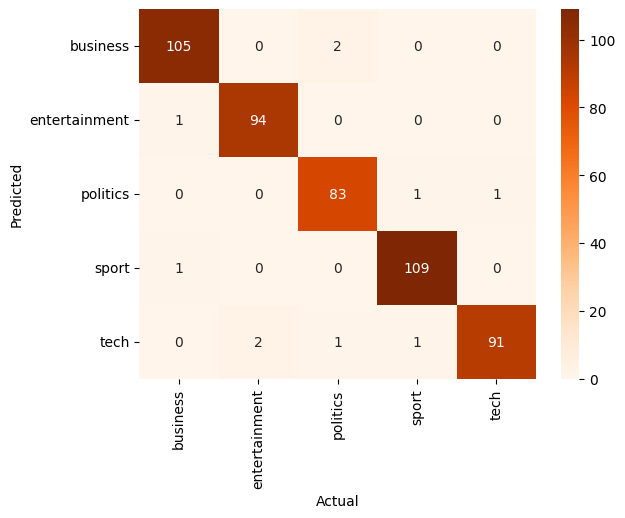

In [43]:
plot_matrix(y_test, y_pred)

# 3. Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(max_depth=10, random_state=18)

rfc1.fit(X_train, y_train)
y_predicted = rfc1.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.943089430894309


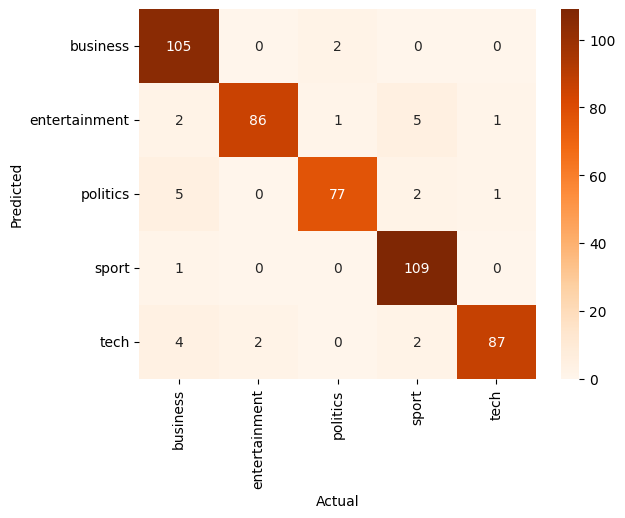

In [45]:
plot_matrix(y_test, y_predicted)

In [46]:
rfc2 = RandomForestClassifier(max_depth=20, random_state=25)

rfc2.fit(X_train, y_train)
y_predicted = rfc2.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9573170731707317


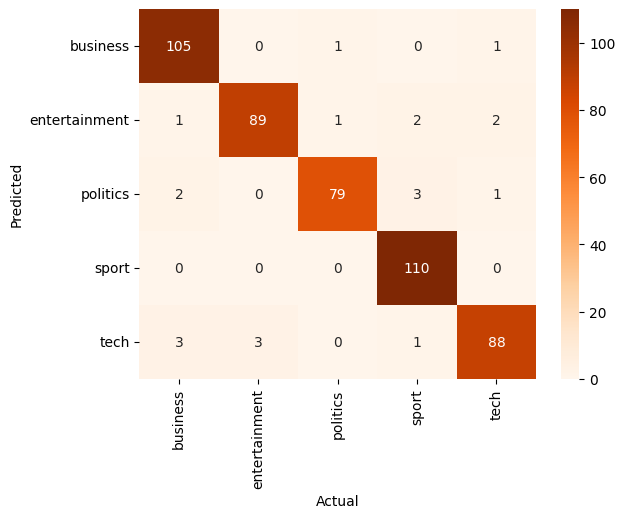

In [47]:
plot_matrix(y_test, y_predicted)

In [48]:
rfc3 = RandomForestClassifier(max_depth=50, random_state=38)

rfc3.fit(X_train, y_train)
y_predicted = rfc3.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9695121951219512


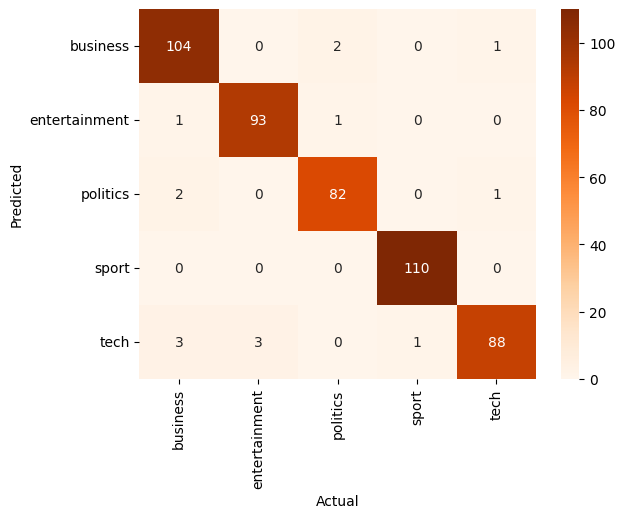

In [49]:
plot_matrix(y_test, y_predicted)

In [50]:
rfc4 = RandomForestClassifier(max_depth=100, random_state=80)

rfc4.fit(X_train, y_train)
y_predicted = rfc4.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9613821138211383


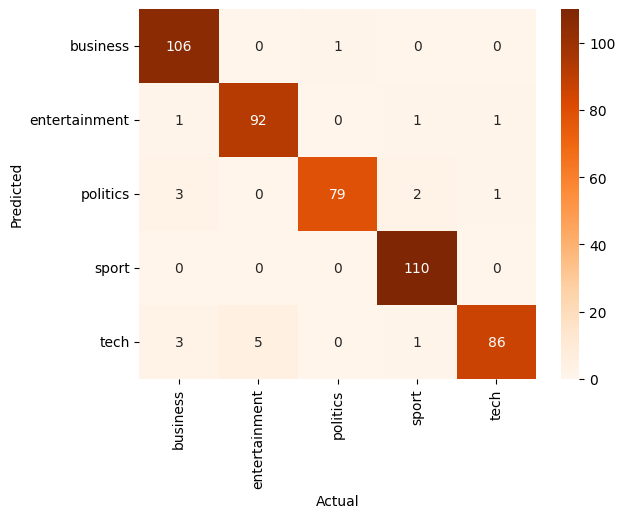

In [51]:
plot_matrix(y_test, y_predicted)

In [52]:
rfc5 = RandomForestClassifier(max_depth=200, random_state=150)

rfc5.fit(X_train, y_train)
y_predicted = rfc5.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9634146341463414


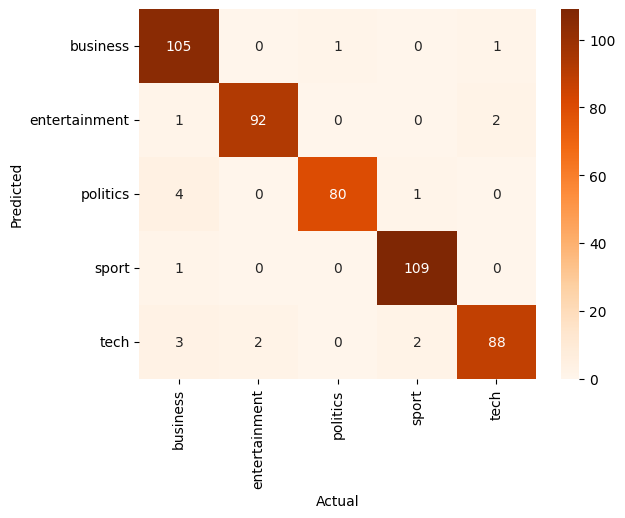

In [53]:
plot_matrix(y_test, y_predicted)

In [54]:
rfc6 = RandomForestClassifier(max_depth=300, random_state=280)

rfc6.fit(X_train, y_train)
y_predicted = rfc6.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9634146341463414


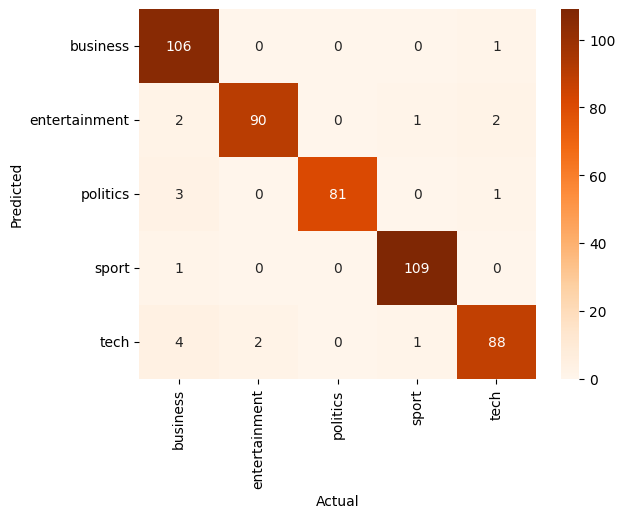

In [55]:
plot_matrix(y_test, y_predicted)

In [56]:
rfc7 = RandomForestClassifier(max_depth=400, random_state=320)

rfc7.fit(X_train, y_train)
y_predicted = rfc7.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9715447154471545


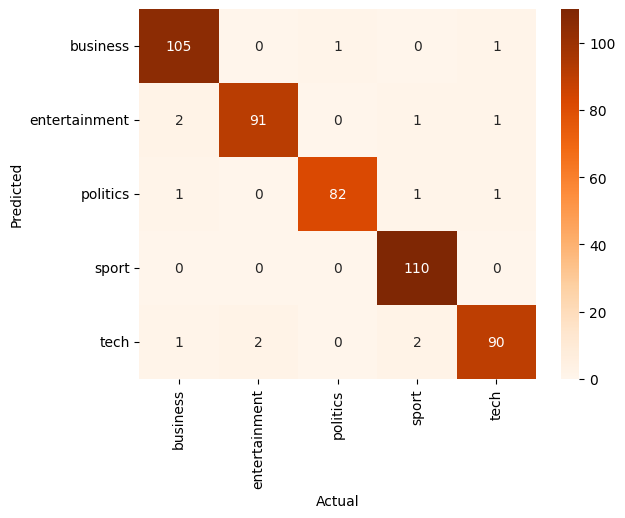

In [57]:
plot_matrix(y_test, y_predicted)

In [58]:
rfc8 = RandomForestClassifier(max_depth=800, random_state=500)

rfc8.fit(X_train, y_train)
y_predicted = rfc8.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9654471544715447


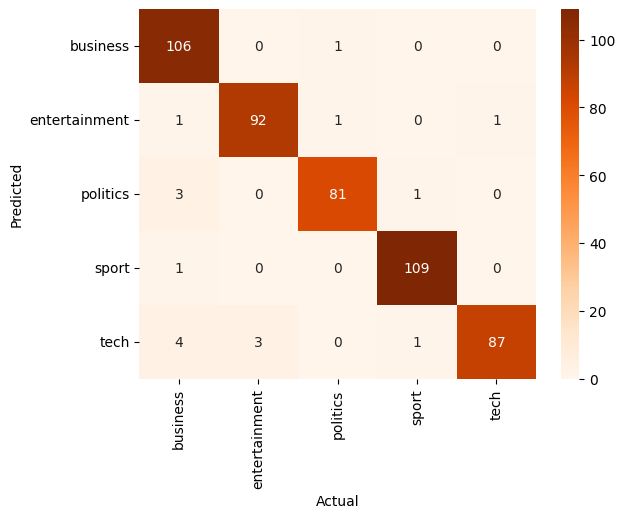

In [59]:
plot_matrix(y_test, y_predicted)

In [60]:
rfc9 = RandomForestClassifier(max_depth=500, random_state=480)

rfc9.fit(X_train, y_train)
y_predicted = rfc9.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

Accuracy : 0.9695121951219512


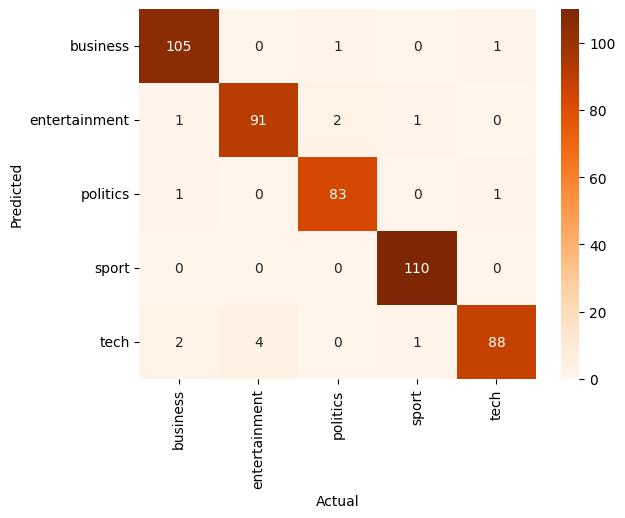

In [61]:
plot_matrix(y_test, y_predicted)

In [62]:
np.average(cross_val_score(rfc8, X, y, cv=10))

np.float64(0.9563758389261745)

# 4. K Nearest Neighbors

Accuracy : 0.9004065040650406
               precision    recall  f1-score   support

     business       0.84      0.93      0.88       107
entertainment       0.90      0.92      0.91        95
     politics       0.82      0.93      0.87        85
        sport       1.00      0.90      0.95       110
         tech       0.96      0.83      0.89        95

     accuracy                           0.90       492
    macro avg       0.90      0.90      0.90       492
 weighted avg       0.91      0.90      0.90       492



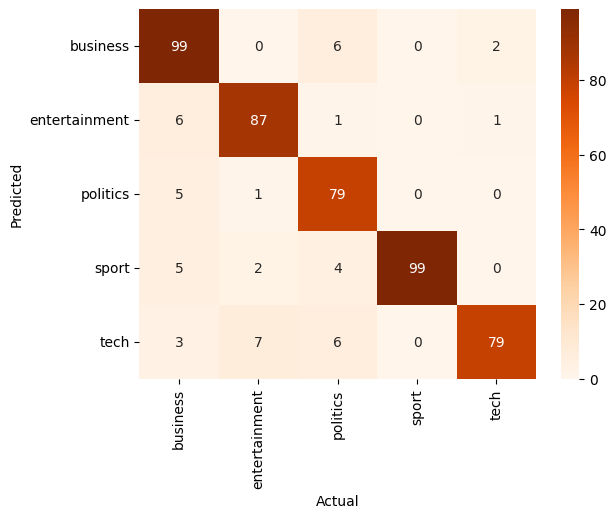

In [63]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Accuracy :",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

plot_matrix(y_test, y_pred)

# 5. Naive Bayes


1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Complement Naive Bayes
4. Bernoulli Naive Bayes
5. Categorical Naive Bayes
6. Out-of-core naive Bayes model fitting


### 1. Gaussian Naive Bayes

Accuracy : 0.9349593495934959
               precision    recall  f1-score   support

     business       0.94      0.88      0.91       107
entertainment       0.93      0.98      0.95        95
     politics       0.92      0.92      0.92        85
        sport       0.99      0.97      0.98       110
         tech       0.89      0.93      0.91        95

     accuracy                           0.93       492
    macro avg       0.93      0.93      0.93       492
 weighted avg       0.94      0.93      0.93       492



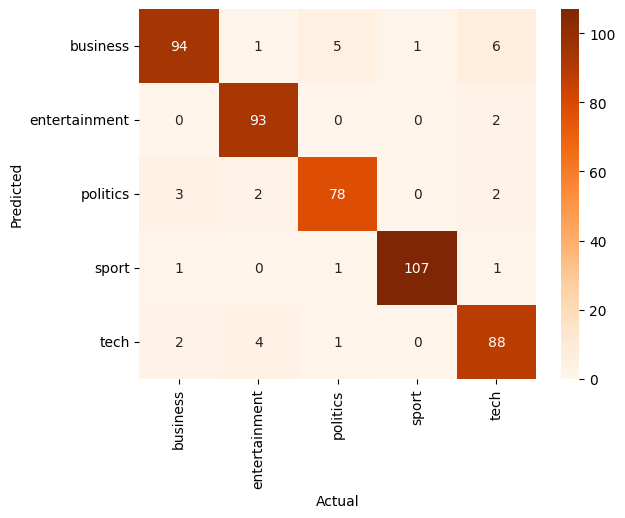

In [64]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_predicted = gnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

plot_matrix(y_test, y_predicted)

### 2. Multinomial Naive Bayes


Accuracy : 0.9715447154471545
               precision    recall  f1-score   support

     business       0.95      0.98      0.97       107
entertainment       0.99      0.97      0.98        95
     politics       0.94      0.96      0.95        85
        sport       0.97      0.99      0.98       110
         tech       1.00      0.95      0.97        95

     accuracy                           0.97       492
    macro avg       0.97      0.97      0.97       492
 weighted avg       0.97      0.97      0.97       492



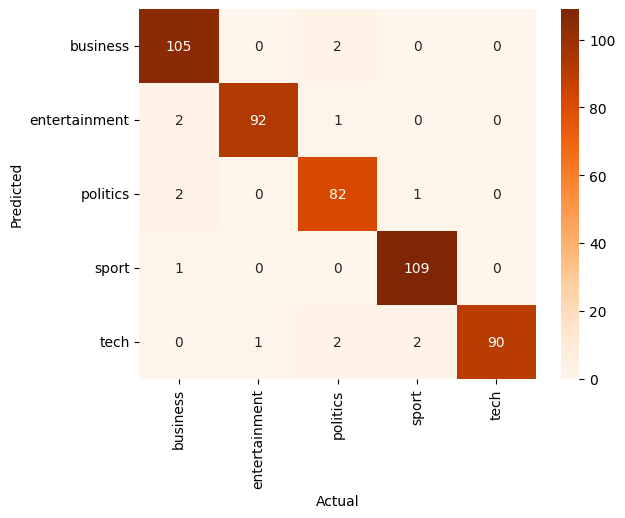

In [65]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train.toarray(), y_train)
y_predicted = mnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))
plot_matrix(y_test, y_predicted)

### 3. Complement Naive Bayes

Accuracy : 0.9776422764227642
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       107
entertainment       0.99      0.98      0.98        95
     politics       0.94      0.99      0.97        85
        sport       0.99      0.99      0.99       110
         tech       0.98      0.97      0.97        95

     accuracy                           0.98       492
    macro avg       0.98      0.98      0.98       492
 weighted avg       0.98      0.98      0.98       492



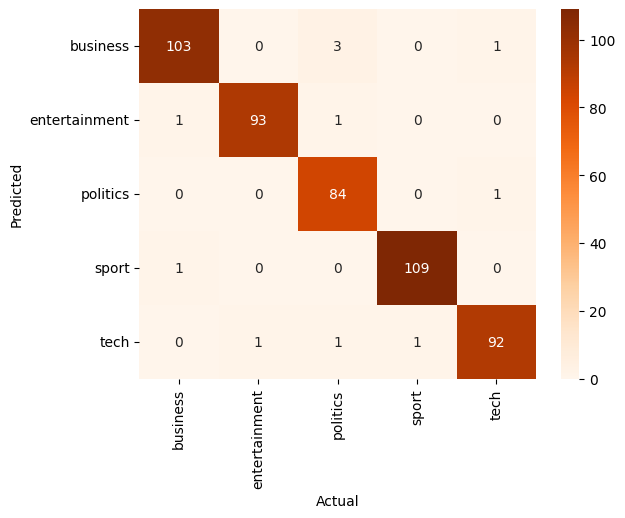

In [66]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_predicted = cnb.predict(X_test.toarray())
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

plot_matrix(y_test, y_predicted)

### 4. Bernoulli Naive Bayes

Accuracy : 0.9288617886178862
               precision    recall  f1-score   support

     business       0.79      0.99      0.88       107
entertainment       0.98      0.96      0.97        95
     politics       0.97      0.85      0.91        85
        sport       0.98      0.99      0.99       110
         tech       0.99      0.83      0.90        95

     accuracy                           0.93       492
    macro avg       0.94      0.92      0.93       492
 weighted avg       0.94      0.93      0.93       492



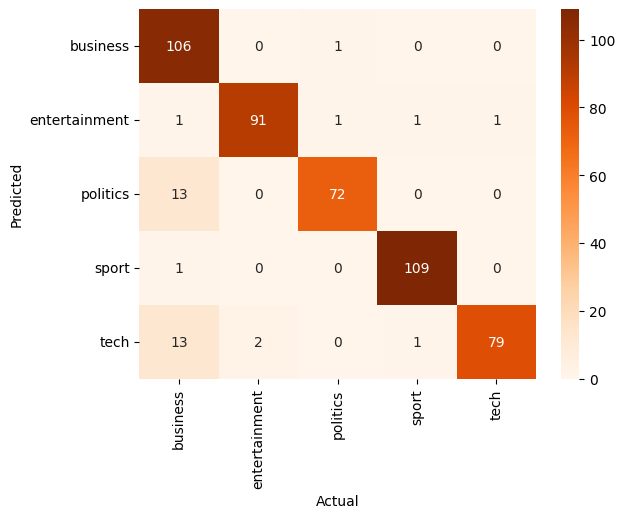

In [67]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_predicted = bnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test, y_predicted))

print(classification_report(y_test, y_predicted))

plot_matrix(y_test, y_predicted)

## Save Model

In [68]:
import pickle as pk

In [ ]:
with open("cnb.pk", "wb") as f:
    pk.dump(cnb, f)

In [ ]:
with open("cnb.pk", "rb") as f:
    Y = pk.load(f)

In [81]:
detect_catagory(Y, article)

np.str_('business')

In [82]:
with open("TfIdf_Vectorizer.pk", "wb") as f:
    pk.dump(TfIdf_Vectorizer, f)

In [83]:
with open("TfIdf_Vectorizer.pk", "rb") as f:
    pk.load(f)

# Test Some Random Articles

In [84]:
business = """
New Delhi:

SpiceJet employees on Wednesday alleged delay in the disbursal of salaries for the second straight month, with the budget airline saying the payments were being made in a "graded format".

There was a delay in disbursal of salary for staff, including flight crew, for the month of July and many are yet to get the Form 16 for the financial year 2021-22 as well, SpiceJet employees claimed.

"The salary disbursal was timely for June. Also, the salaries are yet to match the pre-COVID-19 levels. The salaries being disbursed to captains and first officers are not even 50 per cent of what they used to be before the pandemic outbreak in March 2020," an employee told PTI.

However, SpiceJet claimed it has started salary disbursal in a "graded format".

"We have started crediting salaries from today. Like the previous month, salary will be credited in a graded format," the airline said in a statement to PTI.

In an internal communication Wednesday, the SpiceJet's Human Resources team informed employees about the delays citing that the "previous few months have been difficult" due to "superlative fuel price hike" and also "historically lean period of July-September".

"We have started to see some green shoots of relief with reduction in fuel price effective August 1. Passenger demand is also expected to be strong as we enter our traditional strong season in end-September," the communication read.
"""

In [85]:
detect_catagory(cnb, business)

np.str_('business')

In [86]:
politics = """
BJP leader Sushil Kumar Modi took a dig at Bihar Chief Minister Nitish Kumar and his Telangana counterpart K Chandrashekar Rao, saying their meeting scheduled for Wednesday is a “get-together of two daydreamers". Telangana Chief Minister Rao, popularly known as ‘KCR’, is scheduled to arrive in Patna on Wednesday and meet Kumar as both leaders aspire to build a united front against the BJP’s hegemony.

KCR will also be paying cheques of compensation to family members of soldiers who were killed in the stand-off with Chinese troops in the Galwan Valley in eastern Ladakh. Taking a swipe at the meeting, Modi said it is a meeting of two leaders who are losing their base in their respective states and “desiring to become prime minister of the country".

“It is a meeting of two daydreamers who have no standing in front of Prime Minister Narendra Modi," the BJP leader told reporters. He dubbed the meeting as the “latest comedy show of opposition unity." Earlier this month, Nitish Kumar again switched sides, joined hands with the Rashtriya Janata Dal (RJD) of Lalu Prasad Yadav, after parting ways with the Bharatiya Janata Party (BJP).

Sushil Modi was a deputy chief minister for more than a decade with Kumar as the chief minister in the JD(U)-BJP government in Bihar.
"""

In [87]:
detect_catagory(cnb, politics)

np.str_('politics')

In [88]:
sport = """
Sarfaraz Khan will be aiming to convert his stupendous domestic performances into big runs at the international level when he takes strike for India A in the first unofficial Test against New Zealand A from Thursday.

The New Zealand A side comprises at least half a dozen of players who have represented the senior national team in some format over the years and would give competition to the home team. Most of the players in the Indian squad are the ones who played an A series in South Africa late last year and would like to consolidate their positions in the Test team’s pecking order. But no one would get the kind of traction that Sarfaraz is supposed to as he is back at the same venue where he scored a hundred in the Ranji Trophy final a couple of months ago. While the chosen ones are either proven domestic performers or the likes of Kuldeep Yadav, who would like to get his mojo back having missed out on the red ball domestic season last time. But in the case of the burly Mumbaikar, the attention would be much more because, after a near 1000-run Ranji Trophy season, he is literally knocking on the senior national team’s doors.

India’s next Test assignment is in Bangladesh in December, after the T20 World Cup in Australia. In that squad, there could be at least one vacant middle order slot, if not two, and Sarfaraz is a serious contender to board the Dhaka-bound flight.

A strong indication of that has been given by the selectors, who decided to drop Hanuma Vihari from the India A side, and he will be playing the Duleep Trophy for South Zone, like Shreyas Iyer for the West Zone.It can be said with some degree of certainty that the national selection committee is still not sanguine whether Vihari and Iyer are long-term solutions for India’s middle-order problems, with Cheteshwar Pujara and Ajinkya Rahane set to be phased out in the coming times. Hence the performances of Sarfaraz and the likes of Ruturaj Gaikwad would be closely monitored. Even skipper Priyank Panchal and his long-time A team partner Abhimanyu Easwaran would like to score heavily against bowlers like Matt Fisher, Benjamin Lister and Test spinner Rachin Ravindra. While Rohit Sharma and KL Rahul are India’s top opening pair and Shubman Gill being a floater in Tests, there is a place for another specialist opener, who could get opportunities in the future as the current skipper isn’t getting any younger.
"""

In [89]:
detect_catagory(cnb, sport)

np.str_('sport')